In [1]:
%matplotlib widget
import lightkurve as lk
from Pyriod import Pyriod
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
tic = '5724661'

search = lk.search_lightcurve(target=f'TIC {tic}', author='SPOC')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 29,2020,SPOC,20,5724661,0.0
1,TESS Sector 29,2020,SPOC,120,5724661,0.0
2,TESS Sector 42,2021,SPOC,20,5724661,0.0
3,TESS Sector 42,2021,SPOC,120,5724661,0.0


In [10]:
index = 0
lc = search[index].download().normalize().remove_outliers(sigma=3.5)
#lc = search.download_all().stitch()
sector = search.table['mission'][index][12:]

pyriod = Pyriod(lc, freq_unit='1/day')
pyriod.Pyriod()

C:\Users\jcfis\anaconda3\Lib\site-packages\lmfit\printfuncs.py:187: RuntimeWarning: divide by zero encountered in scalar divide
  spercent = f'({abs(par.stderr/par.value):.2%})'
C:\Users\jcfis\anaconda3\Lib\site-packages\lmfit\printfuncs.py:393: RuntimeWarning: divide by zero encountered in scalar divide
  spercent = f'({abs(par.stderr/par.value):.2%})'


In [14]:
pyriod.lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2,include,model,resid
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,,,
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float64,float64,float64
2088.2448864334565,9.9792367e-01,4.4989856e-03,5.6285667e-03,3718590,735.57313,909.63263,4.5516841e+03,2.0569847e+01,1.6598315e+03,8.1034813e+00,5.4060596e+03,2.4372389e+01,0,———,———,———,———,735.57313,3.3542879e-03,909.63263,3.4013521e-03,-9.6309751e-02,1.5515231e-01,1.0,0.999730401890015,-1.8067297e-03
2088.2451179185623,9.9401665e-01,4.4953506e-03,5.6285704e-03,3718591,735.58653,909.63837,4.5330073e+03,2.0553228e+01,1.6577325e+03,8.1131258e+00,5.3848940e+03,2.4352697e+01,0,———,———,———,———,735.58653,3.3732734e-03,909.63837,3.4152502e-03,-7.8605935e-02,1.5157965e-01,1.0,0.9997202781430538,-5.7036308e-03
2088.245349403668,1.0006831e+00,4.5022340e-03,5.6285742e-03,3718592,735.57925,909.61965,4.5650728e+03,2.0584700e+01,1.6556696e+03,8.1085386e+00,5.4210078e+03,2.4389988e+01,0,———,———,———,———,735.57925,3.3361865e-03,909.61965,3.3988324e-03,-8.5142292e-02,1.3835271e-01,1.0,0.9997107938054924,9.7227542e-04
2088.2455808887744,9.9860555e-01,4.5018508e-03,5.6285779e-03,3718593,735.56167,909.61787,4.5560679e+03,2.0582947e+01,1.6579332e+03,8.1049614e+00,5.4097534e+03,2.4387911e+01,0,———,———,———,———,735.56167,3.3488979e-03,909.61787,3.3956661e-03,-1.1117907e-01,1.4097276e-01,1.0,0.9997019944463833,-1.0964451e-03
2088.2458123738797,9.9924910e-01,4.4962117e-03,5.6285816e-03,3718594,735.57928,909.64131,4.5541025e+03,2.0557163e+01,1.6545208e+03,8.0950584e+00,5.4132397e+03,2.4357361e+01,0,———,———,———,———,735.57928,3.3442993e-03,909.64131,3.3970459e-03,-9.0389982e-02,1.5956788e-01,1.0,0.999693923957375,-4.4482327e-04
2088.2460438594508,9.9878186e-01,4.4998438e-03,5.6285858e-03,3718595,735.59419,909.63724,4.5515845e+03,2.0573771e+01,1.6630007e+03,8.1143875e+00,5.4107085e+03,2.4377037e+01,0,———,———,———,———,735.59419,3.3544607e-03,909.63724,3.4151531e-03,-7.4514456e-02,1.5515803e-01,1.0,0.9996866243686082,-9.0476449e-04
2088.246275344557,1.0036300e+00,4.5014531e-03,5.6285895e-03,3718596,735.58560,909.62520,4.5788267e+03,2.0581129e+01,1.6575042e+03,8.0919704e+00,5.4369727e+03,2.4385757e+01,0,———,———,———,———,735.58560,3.3239187e-03,909.62520,3.3925958e-03,-8.4494017e-02,1.3820480e-01,1.0,0.9996801357426924,3.9499063e-03
2088.2465068296624,9.9436891e-01,4.4951127e-03,5.6285933e-03,3718597,735.57771,909.63328,4.5340615e+03,2.0552139e+01,1.6656180e+03,8.1089373e+00,5.3868022e+03,2.4351408e+01,0,———,———,———,———,735.57771,3.3492304e-03,909.63328,3.4143508e-03,-8.1085376e-02,1.5168241e-01,1.0,0.9996744959268744,-5.3055851e-03


In [15]:
resid_lc = pyriod.lc['resid'].value
time = pyriod.lc['time'].value
data = pd.DataFrame(np.column_stack([time, resid_lc]), columns=['Time', 'Resid_flux'])

data.to_csv(f'../sdB/pre_whitening_tests/residualLC_{tic}_{sector}.dat', sep=' ', index=None, header=None)

In [13]:
resid_lc

MaskedNDArray([0.00222283, 0.04452806, 0.02070681, ..., 0.06627007,
               0.10910846, 0.05724423])

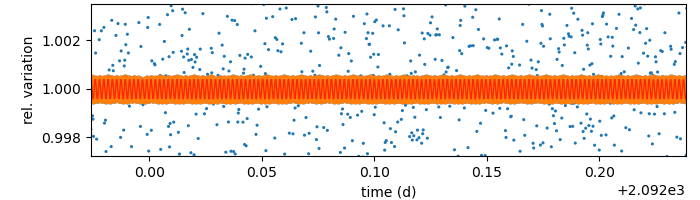

In [13]:
model_lc = pyriod.lc['model'].value
time = pyriod.lc['time'].value

plt.scatter(time, model_lc)
plt.show();